1.) Once again, read in the file '2002FemPreg.csv'. Strip any whitespace from the column names. 

In [1]:
import pandas as pd 
import numpy as np 
import random 
import matplotlib.pyplot as plt 
%matplotlib inline 

In [7]:
#insert 1
preg = pd.read_csv('data/2002FemPreg.csv', index_col = 0)
preg.columns = preg.columns.str.strip()
preg.head()
preg.size

3316692

2.) Reduce the dataframe to only contain data on live births (meaning the preg.outcome == 1).

In [8]:
#insert 2
preg = preg[(preg.outcome == 1)]
preg.head()
preg.size

2232112

3.) Reduce the data frame further to consider data for only non-null baby weights (totalwgt_lb) and non-null mother's age values (agepreg).

In [10]:
#insert 3
preg = preg.dropna(subset=['agepreg', 'totalwgt_lb'])
preg.size

2205272

4.) Update the mother's age column so that the ages are no longer but decimals but rounded down integers. Meaning, if the woman's age is saved as 47.8, then re-save it as 47. Hint: recast the column data type as an integer.

In [64]:
#insert 4
preg['agepreg'] = preg['agepreg'].astype(int)

5.) Make a histogram of the womens' ages. Label axes and give a title.

Text(0, 0.5, 'counts')

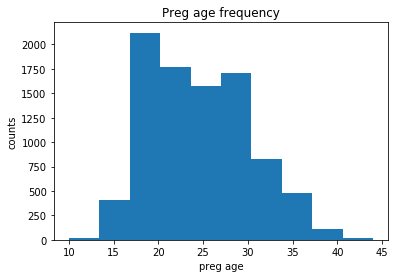

In [22]:
#insert 5
plt.hist(preg['agepreg'])
plt.title('Preg age frequency')
plt.xlabel('preg age')
plt.ylabel('counts')

6.) Create a frequency chart in descending order of age frequency.

In [35]:
#insert 6
preg.agepreg.value_counts(ascending=False)

21    636
20    631
23    588
24    558
19    557
22    549
18    539
26    512
25    508
27    485
28    439
17    393
30    392
29    392
31    336
32    276
16    237
33    218
34    171
35    133
15    126
36     98
37     82
38     54
14     43
39     34
40     19
41     13
13     11
10      2
42      2
11      1
12      1
44      1
43      1
Name: agepreg, dtype: int64

7.) Create a frequency chart in ascending order of age.

In [36]:
#insert 7
preg.agepreg.value_counts(ascending=True)

43      1
44      1
12      1
11      1
42      2
10      2
13     11
41     13
40     19
39     34
14     43
38     54
37     82
36     98
15    126
35    133
34    171
33    218
16    237
32    276
31    336
29    392
30    392
17    393
28    439
27    485
25    508
26    512
18    539
22    549
19    557
24    558
23    588
20    631
21    636
Name: agepreg, dtype: int64

8.) How old was the youngest and oldest mother in the survey and how much did their baby weigh?

In [53]:
#insert 8
o = preg[(preg.agepreg == preg.agepreg.max())]
print('oldest age:', o.agepreg.values[0], 'weight:', o.totalwgt_lb.values[0])
y = preg[(preg.agepreg == preg.agepreg.min())]
print('youngest age:', y.agepreg.values[0], 'weight:', y.totalwgt_lb.values[0])
# probably just by chance the weights are the same

oldest age: 44 weight: 6.4375
youngest age: 10 weight: 6.4375


9.) What is the average woman's age? What is the woman's age in the 25th quartile? The 75th?

In [62]:
#insert 9
print('avg age: ', preg.agepreg.mean())
print('25th quartile: ', preg.agepreg.quantile(q=0.25))
print('75th quartile: ', preg.agepreg.quantile(q=0.75))

avg age:  24.47975215755698
25th quartile:  20.0
75th quartile:  28.0


10.) Find the average birthweight for the mothers in the youngest quartile and in the oldest quartile. Might younger mothers tend to have heavier babies?

In [67]:
#insert 10
print('avg of youngest 25%: ', preg[(preg.agepreg <= 20)].totalwgt_lb.mean())
print('avg of oldest 25%: ', preg[(preg.agepreg >= 28)].totalwgt_lb.mean())

avg of youngest 25%:  7.1012150728059815
avg of oldest 25%:  7.369950206689214


11.) Make a comparative histogram of baby weights for mothers in the youngest and oldest quartile.

Text(0.5, 1.0, 'Weight comparison of old vs young birth')

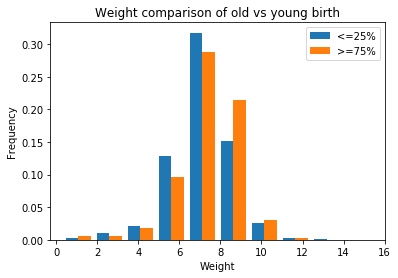

In [80]:
#insert 11
young = preg[(preg.agepreg <= 20)].totalwgt_lb
old = preg[(preg.agepreg >= 28)].totalwgt_lb
plt.hist([young, old], density=True)
plt.legend(['<=25%', '>=75%'])
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.title('Weight comparison of old vs young birth')

By the way, where did this large pregnancy dataset come from? I found it in a super amazing open resource, online Python statistics book called Think Stats. You should check out all of the modules here: http://greenteapress.com/thinkstats/

The dataset itself is obtained from the CDC's 2002 Cycle 6 